# Simulation Project
* Name: Jacob Ramah
* Class period: 3rd Period
* Problem number: 10
* Problem text: In the United Kingdom’s Lotto game, a player picks six numbers from 1 to 49 for each ticket. 

    * Rosemary bought one ticket for herself and one for each of her four adult children. 

    * She had the lottery computer randomly select the six numbers on each ticket. 

    * When the six winning numbers were drawn, Rosemary was surprised to find that none of these numbers appeared on any of the five Lotto tickets she had bought. 

    * Should she be?

### Partial Trial Setup
* Example: 1 person walks into the ice cream parlor to order either vanilla, chocolate or strawberry ice cream

In [4]:
import numpy as np
# Write code to run a partial trial
# Refer to your previous simulations as a resource!
lotto = []
ticket = []

while len(lotto) < 6:
    lotto_num = np.random.randint(1, 50)
    if (lotto_num not in lotto): 
        lotto.append(lotto_num)

while len(ticket) < 6:
    ticket_num = np.random.randint(1, 50)
    if (ticket_num not in ticket): 
        ticket.append(ticket_num)
    
numMatch = 0
for num in ticket:
    if num in lotto:
        numMatch += 1

print(numMatch, lotto, ticket)

2 [25, 8, 4, 10, 35, 19] [49, 3, 46, 8, 19, 7]


### Partial Trial Function
* Can you give the above procedure a descriptive name so you can easily call it multiple times? 

In [5]:
# Define a function that runs a partial trial and returns its result appropriately
def generate_lotto():
    lotto = []
    while len(lotto) < 6:
        lotto_num = np.random.randint(1, 50)
        if (lotto_num not in lotto): 
            lotto.append(lotto_num)
    return lotto

# Creates a single ticket and returns how many numbers matched the lottery passed through
def partial_trial(test:list):
    ticket = []
    while len(ticket) < 6:
        ticket_num = np.random.randint(1, 50)
        if (ticket_num not in ticket): 
            ticket.append(ticket_num)
        
    numMatch = 0
    for num in ticket:
        if num in test:
            numMatch += 1
    return numMatch

lotto = generate_lotto()
print(partial_trial(lotto))

0


## Quick simulation to see how many tickets would be needed to win the lotto. || Second sim is Number 5

In [8]:
def win_lotto(lotto:list=lotto):
    ticket = partial_trial(lotto)
    trials = 0
    while ticket < 6:
        ticket = partial_trial(lotto)
        trials += 1
    return f"YOU WON THE LOTTO! It took you {trials} tickets to win!", trials

win_lotto(lotto)

('YOU WON THE LOTTO! It took you 6952730 tickets to win!', 6952730)

In [9]:
results_string = []
results_num = []

for i in range(10_000):
    result = win_lotto(lotto)
    results_string.append(result[0])
    results_num.append(result[1])

total = 0

for result in results_num:
    total += result

average = total / len(results_num)

### Full Trial Setup
* Example: 5 people walk into the ice cream parlor together: do 2 or more order chocolate? 

In [ ]:
# Write code to run a FULL trial
# Refer to your previous simulations as a resource!
lotto = generate_lotto()

# single_result = []
# output = False

# for i in range(5):
#     single_result.append("At Least 1 Match")
#     result = partial_trial(lotto)
#     if(result != 0): 
#         single_result.append("No Match")
#     if("At Least 1 Match" in single_result):
#         output = True
        
numMatch:float = 0

for i in range(5):
    result = partial_trial(lotto)
    numMatch += result

print(numMatch)

7


### Full Trial Function
* Can you give the above procedure a descriptive name so you can easily call it multiple times? 

In [ ]:
# Define a function that runs a FULL trial and returns its result appropriately
lotto = generate_lotto()

# def trial():
#     partial_result = []
#     output = 0

#     for i in range(5):
#         result = partial_trial(lotto)
#         if(result != 0): 
#             partial_result.append("No Match")
#         else:
#             partial_result.append("At Least 1 Match")
#     if("At Least 1 Match" in partial_result):
#         output = 1
#     return output

# Generates 5 tickets and checks how many numbers match from all tickets
def trial(lotto=lotto):
    numMatch:float = 0

    for i in range(5):
        result = partial_trial(lotto) # Generates 1 lotto ticket and then returns how many numbers match
        numMatch += result
    return numMatch
    

### Full Simulation
* Make sure to look at your previous simulations for the number 10,000

In [ ]:
# Run your full trial a large number of times
# Record your data in an array
lotto = generate_lotto()

def run_simulation(n=10000):
    results = []
    for i in range(10000):
        results.append(trial(lotto))
    return results


### Calculate the Results

In [ ]:
# Using the results array, grab appropriate data and perform the necessary calculations
sim_results = run_simulation()

bincount = np.bincount(sim_results)
print(bincount)

chance = bincount[0]/100

print(f"{chance}%")
    
modified_bincount = [0, 0]

for i, _bin in enumerate(bincount):
    if(i == 0):
        modified_bincount[0] = _bin
    else:
        modified_bincount[1] += _bin

print(modified_bincount)

[ 160  789 1676 2236 2121 1593  854  404  122   38    6    1]
1.6%
[160, 9840]


### Display the Results

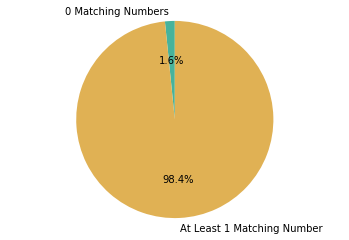

In [ ]:
# Graphically display results related directly to your question
# source: http://matplotlib.org/examples/pie_and_polar_charts/pie_demo_features.html

# Import the library
import matplotlib.pyplot as plot
%matplotlib inline
# Magic to allow the graph to display directly in this notebook

# Create an array of labels
labels = ["0 Matching Numbers", "At Least 1 Matching Number"]

# Explode option
    # 'Slices' appear distanced from the center
        # Larger numbers = further explosion
    # Explode array should be same size as labels and
explode = []
for _bin in modified_bincount:
    explode.append(0)

# Use matplotlib module subplots() to get data for various charts
    # Returns a tuple in the form (figure,axes)
fig1,ax1 = plot.subplots()

# Use axes to create a pie chart
    # ax1.pie(data array, explode array, labels array, starting angle)
ax1.pie(modified_bincount, explode, labels, autopct='%1.1f%%', startangle=90, textprops={"color": "black"}, colors=["#47B39C", "#E0B154"])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plot.show()

### Answer

According to the simulation there is a 1.6% chance that when 5 lotto tickets are pulled there is no match so yes, they should be surprised.

### Additional Question
* What is the chance that 3 numbers match?

### Calculate the Results

In [ ]:
# Using the results array, grab appropriate data and perform the necessary calculations
bincount_2 = [0, 0, 0]
# Seperates the bins into < 3 == 3 and > 3
for i, _bin in enumerate(bincount):
    if i < 3:
        bincount_2[0] += _bin
    elif i == 3:
        bincount_2[1] = _bin
    else:
        bincount_2[2] += _bin
print(bincount_2)

[2625, 2236, 5139]


### Display the Results 

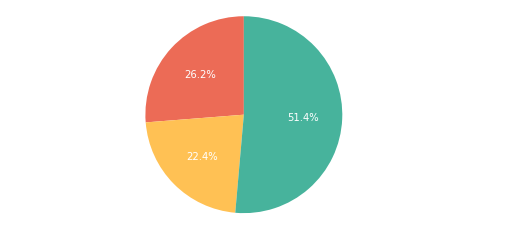

In [ ]:
# Graphically display results related directly to your question
# source: http://matplotlib.org/examples/pie_and_polar_charts/pie_demo_features.html

# Import the library
import matplotlib.pyplot as plot
%matplotlib inline
# Magic to allow the graph to display directly in this notebook

# Create an array of labels
labels = ["Less Than 3 Matching Numbers", "3 Matching Numbers", "More Than 3 Matching Numbers"]

# Explode option
    # 'Slices' appear distanced from the center
        # Larger numbers = further explosion
    # Explode array should be same size as labels and
explode = []
for _bin in bincount_2:
    explode.append(0)

# Use matplotlib module subplots() to get data for various charts
    # Returns a tuple in the form (figure,axes)
fig1,ax1 = plot.subplots()

# Use axes to create a pie chart
    # ax1.pie(data array, explode array, labels array, starting angle)
ax1.pie(bincount_2, explode, labels, autopct='%1.1f%%', startangle=90, textprops={"color": "white"}, colors=["#EC6B56", "#FFC154", "#47B39C"])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plot.show()

According to our simulation the chance that 3 numbers from 5 tickets will match is 22.4%